## NETFLIX EDA
Hi! I'm Martín and this is my first EDA from a netflix movies dataset

first we're going to import the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



### 2)Load the data and study the dimensions

In [2]:
data=pd.read_csv('titles.csv',parse_dates=['date_added','release_year'])
print(data.shape)
print(data.columns)

(7787, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


As we can see we have 7787 rows and 12 columns from this netflix dataset

### 3) Data Overview
In this step we want to know if we have missing or duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   datetime64[ns]
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 730.2+ KB
None
show_id            0
type               0
title              0
director        2389
cast             718
country          507


<AxesSubplot:>

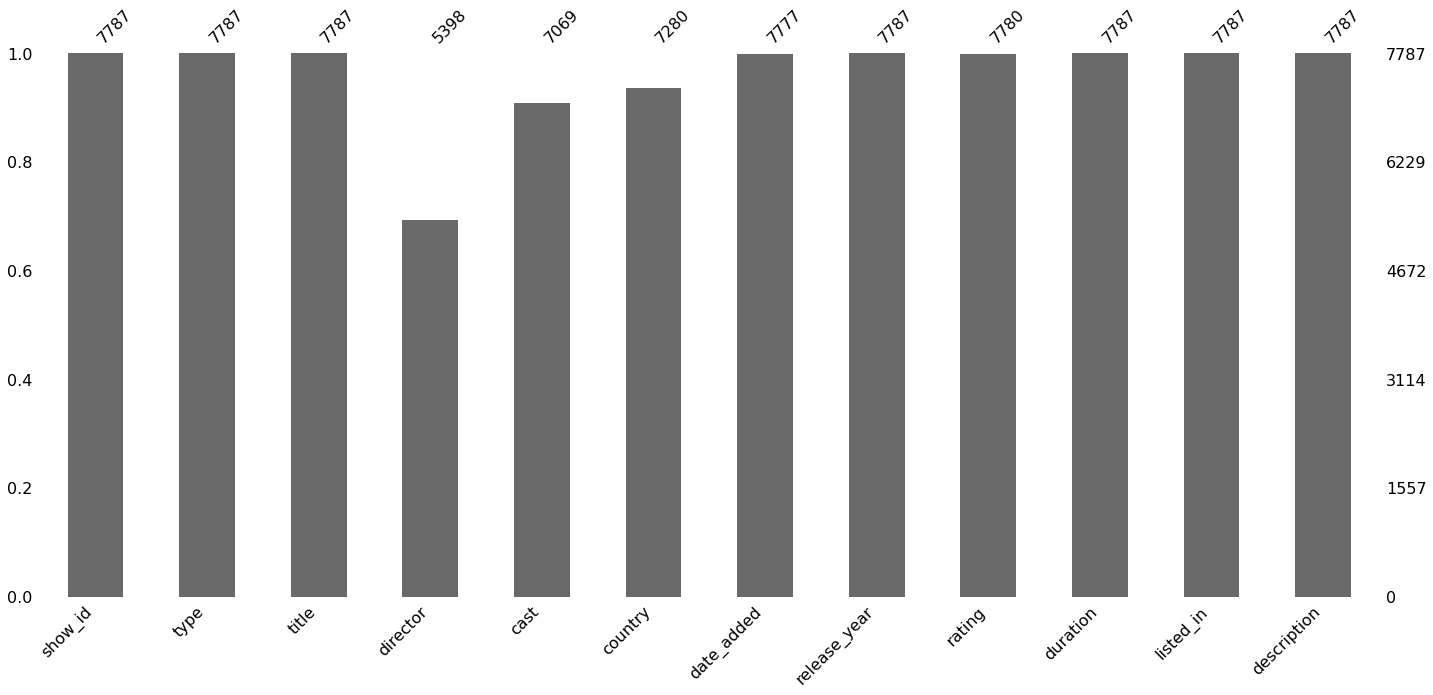

In [3]:
print(data.info())
print(data.isna().sum())
print('Number of duplicated values:',data.duplicated().sum())
msno.bar(data)

we have a large amount of missing values in director and cast columns so we delete them and we preoceed to delete the show_id column too

for the country column we're going to replace the NaN's with the value that repeats the most 

lastly we're going to delete the rows where missing values are in date_added and rating columns because they are only 17 values

In [4]:
data.drop(columns=['director','cast','show_id'],inplace=True)
data['country'] = data['country'].fillna(data['country'].mode()[0])
data.dropna(how='any',subset=['rating','date_added'],inplace=True)
print(data.isna().sum())
print(data.shape)

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
(7770, 9)


### 4)Data Manipulation


Here we proceed to separate the duration column into two new columns. The first is duration_min where the values will be stored in minutes and the other is duration_Seassonsa and here they will be stored seasonally
#separar la duracion en dos columnas min y Season, Seasons

For the date_added column we took off all the values except the year 

In [5]:
#we need to know the all de values in duration
print(data.head(5))
print(data.duration.str.contains('min').sum())
print(data.duration.str.contains('Season').sum())

data['date_added']=data['date_added'].dt.year

      type  title        country date_added release_year rating   duration  \
0  TV Show     3%         Brazil 2020-08-14   2020-01-01  TV-MA  4 Seasons   
1    Movie   7:19         Mexico 2016-12-23   2016-01-01  TV-MA     93 min   
2    Movie  23:59      Singapore 2018-12-20   2011-01-01      R     78 min   
3    Movie      9  United States 2017-11-16   2009-01-01  PG-13     80 min   
4    Movie     21  United States 2020-01-01   2008-01-01  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is fo

### Now we're extracting the principal insights 
*analizar valores mayores por columna (type,country,date added,release,rating,listed i)
*graficar los paises donde mas se ven 
*graficar relacione entre dos columnas


In [6]:
for i in data.columns:
    print(data[i].value_counts())
    print('  \n')

Movie      5372
TV Show    2398
Name: type, dtype: int64
  

Seven and Me                             1
The Dreamer                              1
The Hunt                                 1
The Wiggles                              1
El Dragón: Return of a Warrior           1
                                        ..
Ultraman                                 1
Oversize Cops                            1
Jimmy: The True Story of a True Idiot    1
Mirai                                    1
The Ritual                               1
Name: title, Length: 7770, dtype: int64
  

United States                3051
India                         923
United Kingdom                396
Japan                         224
South Korea                   183
                             ... 
United Kingdom, Australia       1
West Germany                    1
France, Germany                 1
Chile, Peru                     1
Ireland, South Africa           1
Name: country, Length: 681, dtype: int64
  

201

### now we are going to visualize the principal insights from the netflix dataset   

Values have this proportion:


Movie      0.691377
TV Show    0.308623
Name: type, dtype: float64

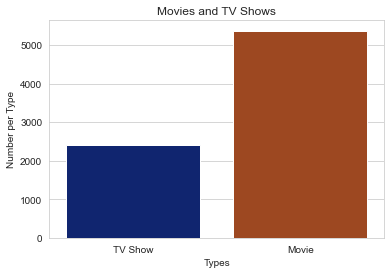

In [7]:
#Netflix type proportion
sns.set_style("whitegrid")
ptype=sns.countplot(data=data,x='type',palette='dark')
plt.title('Movies and TV Shows')
ptype.set(ylabel='Number per Type',xlabel='Types')

print('Values have this proportion:')
data.type.value_counts(normalize=True)



it can be clearly seen that there are many more movies than tv shows




the country variable will now be investigated but it has a large amount of values so we'll take the first ten

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'United States'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'South Korea'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'France'),
 Text(8, 0, 'Egypt'),
 Text(9, 0, 'Mexico')]

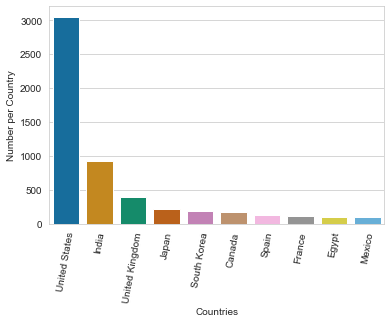

In [8]:
#10 top countries
countries10=data.country.value_counts().iloc[0:10]

cnt=sns.barplot(countries10.index,countries10.values,palette='colorblind')
cnt.set(ylabel='Number per Country',xlabel='Countries')
cnt.set_xticklabels(labels=countries10.index,rotation=80)


United States definitly has more movies than every country in this platform. Maybe because Netflix is from that country.


Now well be investigated the proportion of movies and tv shows that are from united states

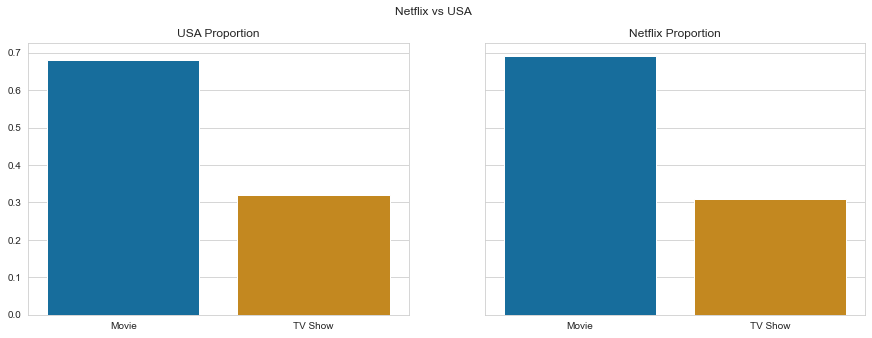

In [9]:
usa=data[data['country']=='United States']
usaT=usa.type.value_counts(normalize=True)
netT=data.type.value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Netflix vs USA')

#USA proportion
sns.barplot(ax=axes[0], x=usaT.index,y=usaT.values,palette='colorblind')
axes[0].set_title('USA Proportion')

#Netflix proportion
sns.barplot(ax=axes[1], x=netT.index,y=netT.values,palette='colorblind')
axes[1].set_title('Netflix Proportion')
plt.show()


As we can see, the proportion of netflix and USA are almost the same